<a href="https://colab.research.google.com/github/ridvanyigit/My-Projects/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Required Libraries

In [1]:
# Importing necessary libraries for building the CNN model, handling data, and visualizing results.
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

Load and Visualize the Dataset

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
Training set shape: (50000, 32, 32, 3), Labels shape: (50000, 1)
Test set shape: (10000, 32, 32, 3), Labels shape: (10000, 1)


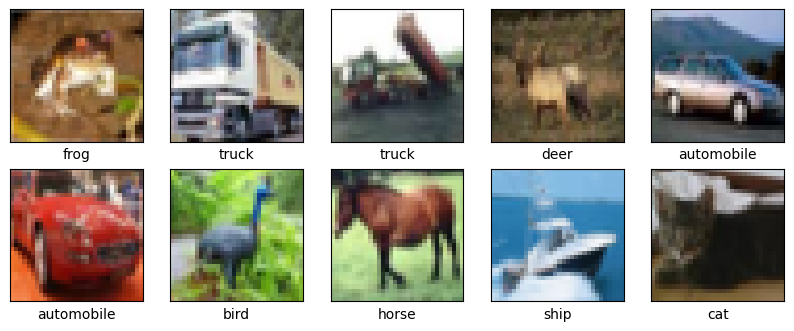

In [2]:
# Loading the CIFAR-10 dataset from TensorFlow. It comes pre-split into training and testing sets.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Display the shapes of training and testing sets for verification.
print(f"Training set shape: {x_train.shape}, Labels shape: {y_train.shape}")
print(f"Test set shape: {x_test.shape}, Labels shape: {y_test.shape}")

# Defining the class names for easy visualization of labels.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Visualizing the first 10 images in the training set along with their labels.
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])  # Removing x-axis ticks
    plt.yticks([])  # Removing y-axis ticks
    plt.grid(False) # Disabling grid lines
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])  # Labeling each image with its class name
plt.show()

Preprocess the Data

In [3]:
# Normalizing the pixel values of images to be between 0 and 1, improving model efficiency.
x_train = x_train / 255.0
x_test = x_test / 255.0

Define the CNN Model

In [4]:
# Building the CNN model architecture.
# It consists of three convolutional layers, followed by max pooling, and fully connected dense layers.

model = models.Sequential()

# First convolutional layer with 32 filters, 3x3 kernel size, followed by max pooling.
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer with 64 filters, followed by max pooling.
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer with 64 filters.
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output before passing it into dense layers.
model.add(layers.Flatten())

# Fully connected layer with 64 units.
model.add(layers.Dense(64, activation='relu'))

# Output layer with 10 units (one for each class), no softmax here because it's handled by the loss function.
model.add(layers.Dense(10))

# Model summary to view the layers and the number of parameters.
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Compile the Model

In [5]:
# Compiling the model with Adam optimizer and sparse categorical crossentropy as the loss function.
# Accuracy will be tracked as the performance metric.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train the Model

In [6]:
# Training the model on the training set with 10 epochs. Validation will be done using the test set.
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 48ms/step - accuracy: 0.3556 - loss: 1.7405 - val_accuracy: 0.5477 - val_loss: 1.2735
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.5880 - loss: 1.1612 - val_accuracy: 0.6306 - val_loss: 1.0457
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.6506 - loss: 0.9890 - val_accuracy: 0.6653 - val_loss: 0.9717
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 45ms/step - accuracy: 0.6905 - loss: 0.8824 - val_accuracy: 0.6768 - val_loss: 0.9218
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.7196 - loss: 0.8040 - val_accuracy: 0.6840 - val_loss: 0.9120
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.7352 - loss: 0.7523 - val_accuracy: 0.6799 - val_loss: 0.9480
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.7602 - loss: 0.6866 - val_accuracy: 0.6969 - val_loss: 0.9108
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.7708 -

Visualize Training and Validation Accuracy

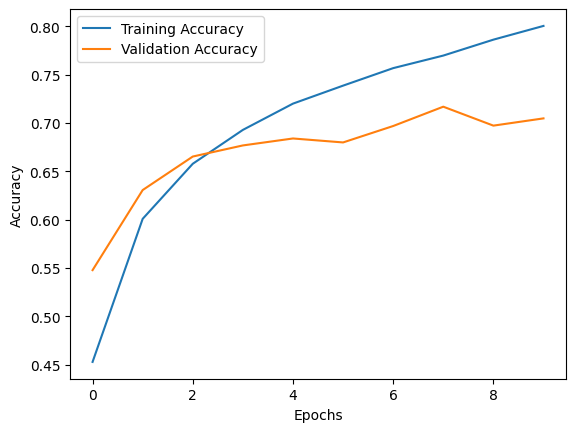

In [7]:
# Plotting the accuracy for both training and validation sets over the 10 epochs.
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Visualize Training and Validation Loss

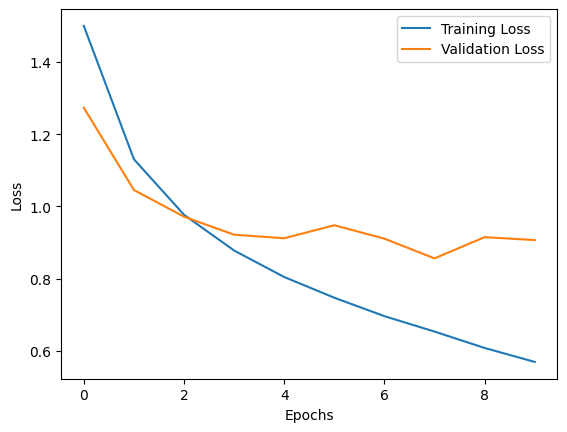

In [8]:
# Plotting the loss for both training and validation sets over the 10 epochs.
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Make Predictions on Test Set

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


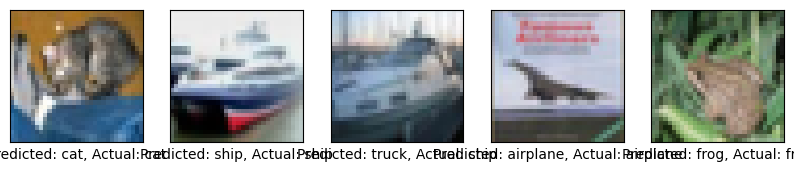

In [9]:
# Making predictions on the test set. Since the model output is logits, we use softmax to convert it to probabilities.
predictions = model.predict(x_test)

# Visualizing the first 5 images from the test set along with predicted and actual labels.
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    predicted_label = np.argmax(predictions[i])  # Taking the class with the highest probability
    true_label = y_test[i][0]
    plt.xlabel(f"Predicted: {class_names[predicted_label]}, Actual: {class_names[true_label]}")
plt.show()

Evaluate the Model on the Test Set

In [10]:
# Finally, evaluating the model's accuracy on the test set to see its generalization performance.
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

313/313 - 5s - 15ms/step - accuracy: 0.7048 - loss: 0.9069

Test accuracy: 0.704800009727478
